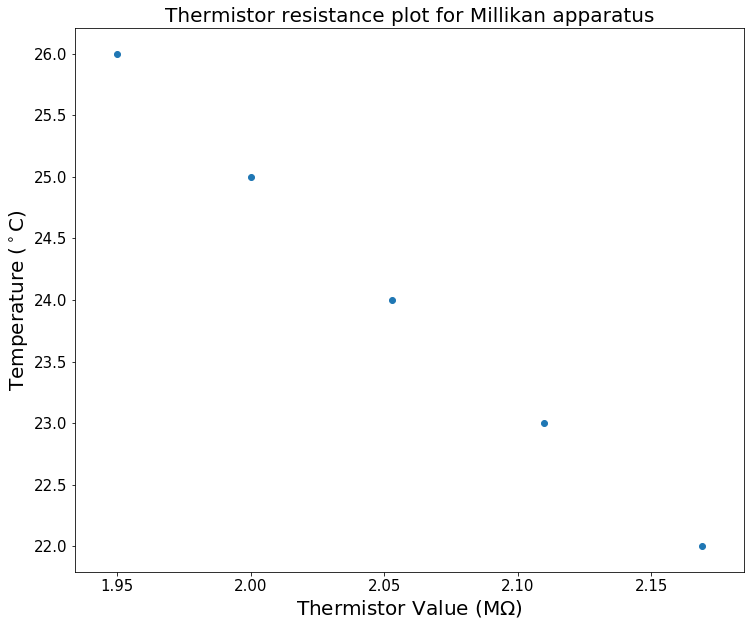

[-18.22705326  61.48211233]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy 
from scipy import optimize
%matplotlib inline 


y=[22,23,24,25,26]
x=[2.169,2.110,2.053,2.000,1.950]
plt.figure(figsize=(12, 10))
Thertemp = plt.scatter(x,y)

plt.title('Thermistor resistance plot for Millikan apparatus', size = 20)
plt.xlabel('Thermistor Value (M$\Omega$)', size = 20)
plt.ylabel('Temperature ($^\circ$C)', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()


def linear_test_func(x, m, c):
    return (m * x) + c

params, params_covariance = optimize.curve_fit(linear_test_func, x, y, p0=[2, 2])

print(params)

In [2]:
#Here I shall calculate the charges on the drops and their errors using python ufloats.
from math import sqrt, pow, pi
from uncertainties import ufloat
from uncertainties import unumpy

#This sections lists the errors
voltunc = 1
etaunc  = 1.66e-6
deltaunc  = 0.0031
A = 0.09
B = 0.07
C = 0.06
D = 0.05
timeuncs = [B,C,D,C,D,C,D,D,B,C,C,C,A,D,C,C]

#This section imports and declares all the needed lists
voltages = [499,499,499,499,499,499,499,487,487,487,487,487,487,487,493,493]
etas     = [2.23E-05, 2.23E-05,2.23E-05,2.23E-05,2.23E-05,2.23E-05,2.23E-05,2.27E-05,2.27E-05,2.27E-05,2.97E-05,2.97E-05,2.30E-05,2.30E-05,2.34E-05,2.34E-05]
deltas   = [1.1683,1.1683,1.1683,1.1683,1.1683,1.1683,1.1683,1.1679,1.1679,1.1679,1.1675,1.1675,1.1669,1.1669,1.1658,1.1658]
falls    = [9.44,8.39,5.67,9.34,10.45,11.10,10.37,3.92,8.25,8.58,8.24,6.70,8.12,7.31,7.13,7.50]
rises    = [5.52,3.84,1.73,3.06,2.72,7.28,1.99,4.31,2.92,3.86,3.57,5.40,5.14,4.55,3.91,3.80]
V = []
E = []
D = []
densDiff = []
T1 = []
T2 = []
doverT1 = []
doverT2 = []
q = []

#define the constants
g = 9.81
d = 5e-4
h = 6.35e-3
rho = 886
const = 9*pi*sqrt(2/g)*h  

#This section pairs the uncertainties with the measurements.
for i in range(0,16,1) : 
    V.append(ufloat(voltages[i], voltunc)) 
    E.append(ufloat(etas[i], etaunc))
    D.append(ufloat(deltas[i], deltaunc))
    densDiff.append(886-D[i])
    T1.append(ufloat(falls[i], timeuncs[i]))
    T2.append(ufloat(rises[i], timeuncs[i]))
    doverT1.append(d/T1[i])
    doverT2.append(d/T2[i])

#Calculate the charges on the drops!.
q = const*np.array(E)**1.5*np.array(densDiff)**-0.5*np.array(V)**-1*np.array(doverT1)**0.5*(np.array(doverT1)+np.array(doverT2))

c=0
for i in q:
    c+=1
    print('Droplet Number {:1} is {:2.3}'.format(c,i))


Droplet Number 1 is 6.01e-19+/-0.67e-19
Droplet Number 2 is 8.43e-19+/-0.95e-19
Droplet Number 3 is 2.04e-18+/-0.23e-18
Droplet Number 4 is 9.13e-19+/-1.03e-19
Droplet Number 5 is 9.22e-19+/-1.04e-19
Droplet Number 6 is 4.39e-19+/-0.49e-19
Droplet Number 7 is 1.20e-18+/-0.14e-18
Droplet Number 8 is 1.66e-18+/-0.18e-18
Droplet Number 9 is 1.09e-18+/-0.12e-18
Droplet Number 10 is 8.68e-19+/-0.96e-19
Droplet Number 11 is 1.42e-18+/-0.12e-18
Droplet Number 12 is 1.31e-18+/-0.11e-18
Droplet Number 13 is 7.69e-19+/-0.84e-19
Droplet Number 14 is 9.10e-19+/-0.99e-19
Droplet Number 15 is 1.04e-18+/-0.11e-18
Droplet Number 16 is 1.01e-18+/-0.11e-18


In [3]:
#Here I shall start to seed the charge data from the students. For ease I will need a new function.

def chargevscharge(data,name):
    '''This function takes in the student charge data, formats it and plots it against itself.
    Required inputs: list of data, a name'''
    
    plt.figure(figsize=(12, 10))
    Echarge = plt.scatter(data,data)

    plt.title('Charge against Charge', size = 20)
    plt.xlabel('Droplet Charge ($10^{-18}$C)', size = 20)
    plt.ylabel('Droplet Charge ($10^{-18}$C)', size = 20)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    
    plotname = 'chargevscharge_'+ name
    plt.savefig(plotname)
    plt.show()

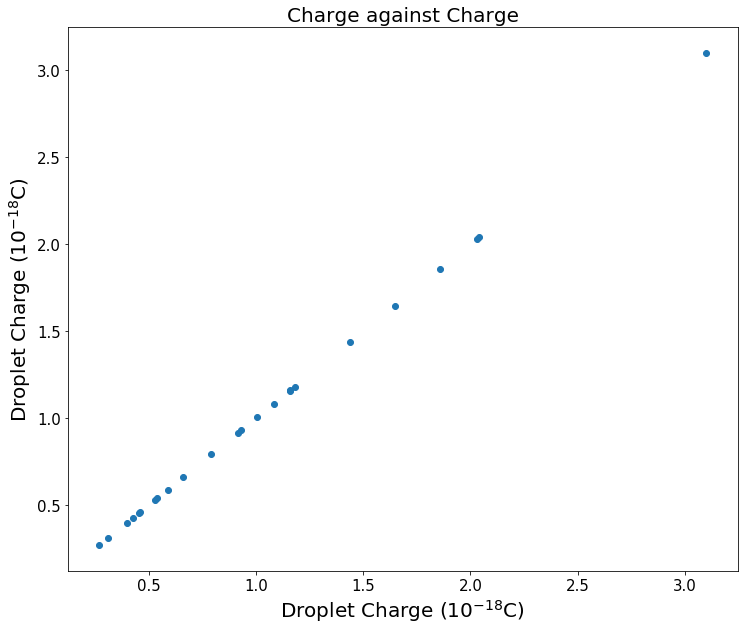

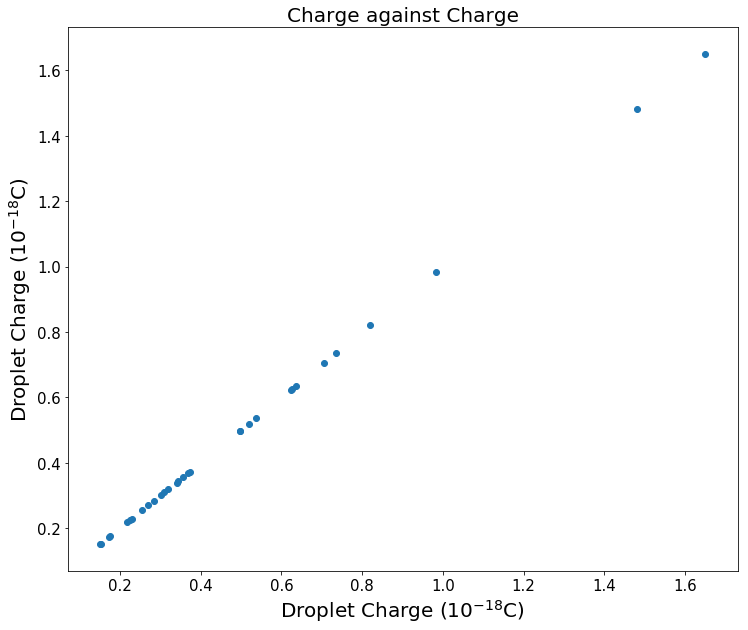

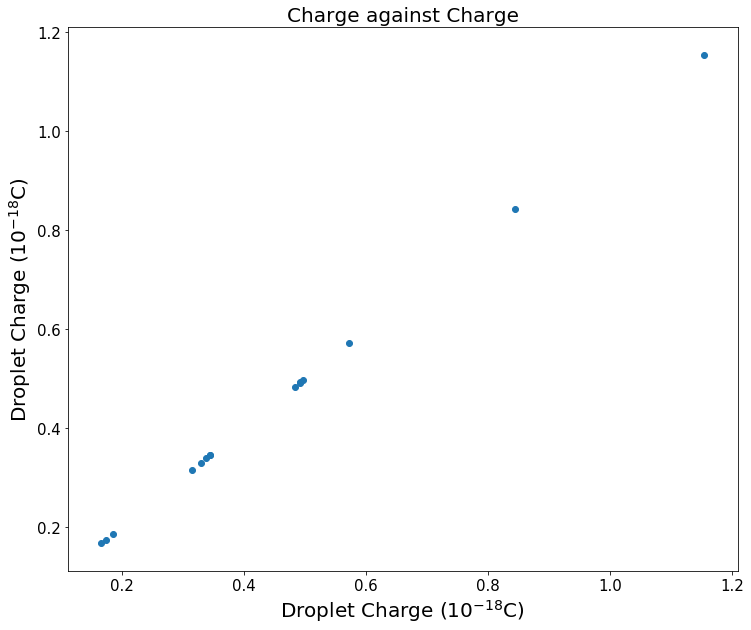

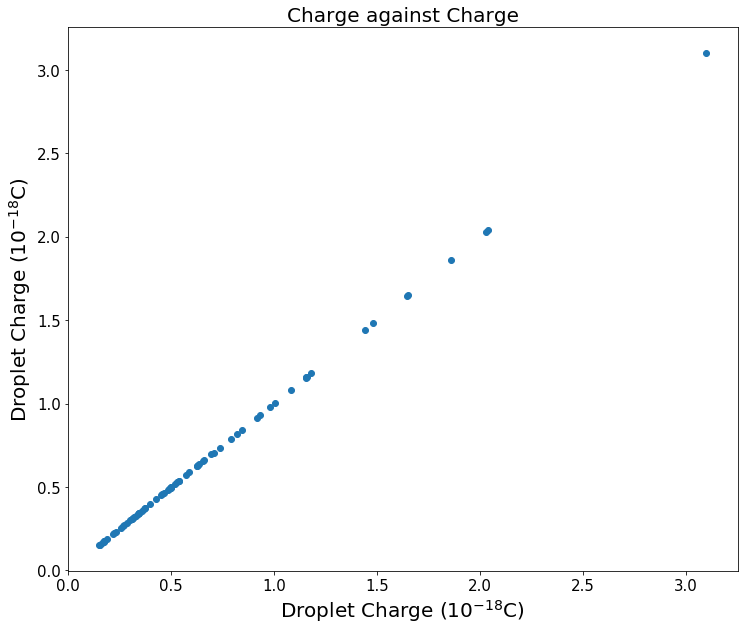

In [4]:
nominalq = unumpy.nominal_values(q) #takes the nominal values and leaves out the uncentainties
errorq = unumpy.std_devs(q) #takes the errors
exp = 10**18
Q = [exp*i for i in nominalq]

#Here I shall start to seed the charge data from the students
AB = [0.284,0.373,0.736,0.255,0.302,0.173,0.706,0.498,0.151,0.624,0.176,0.152,0.536,0.498,0.340,0.625,0.635,0.982,1.65,0.82,1.48,0.368]
DL = [1.156, 0.397, 0.790, 0.538, 1.86, 1.44, 2.03, 1.16, 1.18, 0.916, 2.04, 1.004, 3.10, 0.930]
MF = [0.528, 0.427, 0.31, 1.083, 0.268, 0.457, 1.647,0.451, 0.588, 0.66]
MP = [0.218, 0.224, 0.230, 0.344, 0.310, 0.320, 0.519, 0.357, 0.270]
ME = [0.465, 0.653, 0.696, 0.629, 0.375]
AW = [0.166, 0.344, 0.492, 0.843, 1.154]
MM = [0.174, 0.186, 0.315, 0.329, 0.338, 0.344, 0.483, 0.491, 0.497, 0.572]

Bad = []
Bad2 = []
All = []
Good = []

B_B = DL+MF
B_G = MP+AB
G_G = MM+AW
All = B_B+B_G+G_G+ME

#All = Bad+AB+AW+MM
#chargevscharge(AB,'AB')
#chargevscharge(DL,'DL')
#chargevscharge(MF,'MF')
#chargevscharge(MP,'MP')
#chargevscharge(ME,'ME')
#chargevscharge(AW,'AW')
#chargevscharge(MM,'MM')
chargevscharge(B_B,'Bad')
chargevscharge(B_G,'BadGood')
chargevscharge(G_G,'Good')
chargevscharge(All,'All')

In [5]:
# Create my own clustering algorithm

def OneDClusteringAlg(pointslist, clusterDistance):
    '''Takes in input of a list of points and a characteristic distance you want to cluster your points 
    around and outputs a list of clustered points. The length of your output array may be different to that
    of the input one.'''
    sortedpoints       = pointslist.copy()  
    sortedpoints.sort()                 # Just in case the user does not do it themselves. Doesn't hurt to repeat.
    distances          = []             # a variable to store the distances between the charges
    clusteredpoints    = []             # storage list for the clustered charges  
    count              = 0
    howManyClustered   = 0
    
    for i in range(1,len(sortedpoints),1):  # start from the second element to avoid indices that are out of range
        distances.append(sortedpoints[i] - sortedpoints[i-1]) # start from the second element to avoid indices that are out of range
    
    for i in range(0,len(distances),1):
        #if you merge any drops the next distance along no longer makes any sense, so that entry need to be skipped.
        if count >= 1:
            if i==(len(distances)-1) and count == 1:
                clusteredpoints.append(sortedpoints[len(distances)]) # Ensure you get the last point if the
                                                                     # penultimate point was clustered
            count -=1                                                                     
            continue
        else:
            pass
        
        if distances[i] <= clusterDistance:
            count +=1
            howManyClustered +=1
            while count<(len(distances)-i) : #Tries to find as many consecutive points that fulfil these requirements
                if distances[i+count] <= clusterDistance/2: #Look for the neighbours closer  
                    count+=1
                    howManyClustered +=1
                else:
                    break
            print('There are {} adjacent points whose distances that are less than the threshold'.format(count+1))
            print('Their values are:')
            howManyClustered +=1
            # Calculated the unweigted average of the consecutive points that are seperated by less than the chosen 
            # value        
            sumQ = 0
            for j in range(0,count+1,1):        
                sumQ += sortedpoints[i+j]
                print(sortedpoints[i+j])
            aQ = sumQ/(count+1)
            print('The average of these values is {:.3f}'.format(aQ))
            print(' ')
            clusteredpoints.append(aQ)  # inserts this new point into the clustered charges
            del aQ, sumQ         # removes information from the points once they are used
        
        else: 
            # distances[i] > minSep:
            # If a distance has a large separation you can be confident that the lower of the two points will not be 
            #   clustered
            clusteredpoints.append(sortedpoints[i])
            
            if i==(len(distances)-1):
                clusteredpoints.append(sortedpoints[len(distances)]) # Ensure that you regain the last point if the 
                                                                     # penultimate point was not clustered
            
    print('{} point(s) have been clustered'.format(howManyClustered))
    return clusteredpoints

There are 2 adjacent points whose distances that are less than the threshold
Their values are:
0.268
0.31
The average of these values is 0.289
 
There are 8 adjacent points whose distances that are less than the threshold
Their values are:
0.397
0.427
0.451
0.457
0.528
0.538
0.588
0.66
The average of these values is 0.506
 
There are 4 adjacent points whose distances that are less than the threshold
Their values are:
0.79
0.916
0.93
1.004
The average of these values is 0.910
 
There are 4 adjacent points whose distances that are less than the threshold
Their values are:
1.083
1.156
1.16
1.18
The average of these values is 1.145
 
There are 2 adjacent points whose distances that are less than the threshold
Their values are:
2.03
2.04
The average of these values is 2.035
 
20 point(s) have been clustered
There are 18 adjacent points whose distances that are less than the threshold
Their values are:
0.151
0.152
0.173
0.176
0.218
0.224
0.23
0.255
0.27
0.284
0.302
0.31
0.32
0.34
0.344
0.357

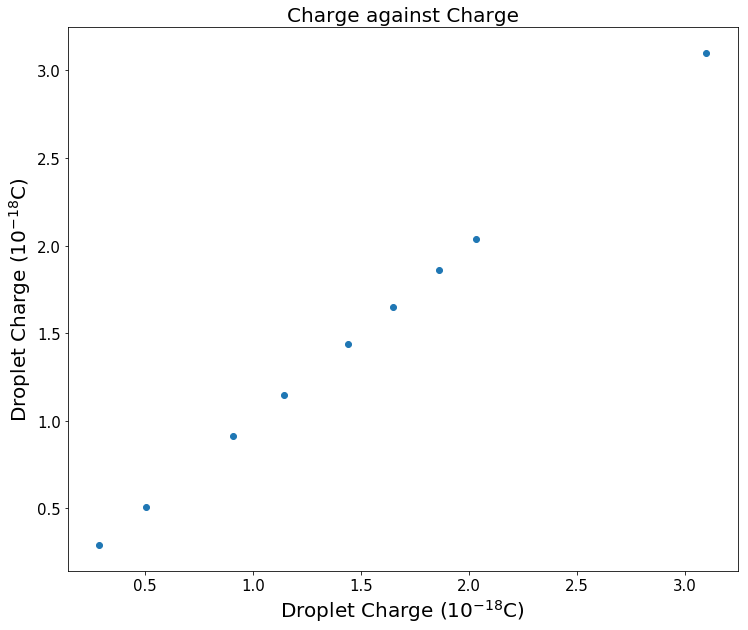

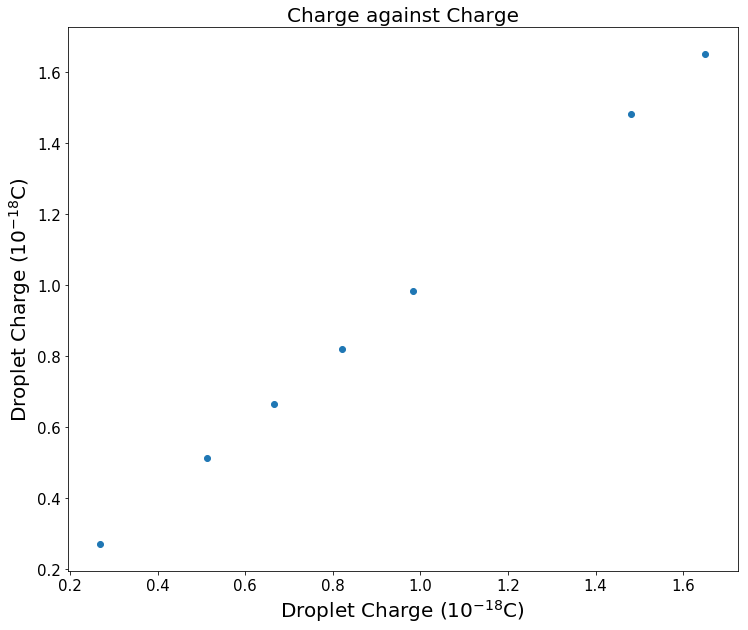

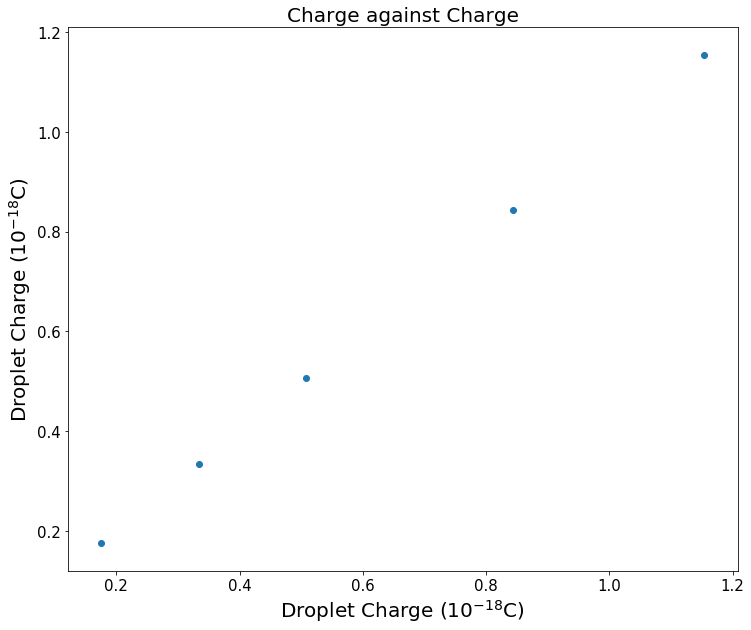

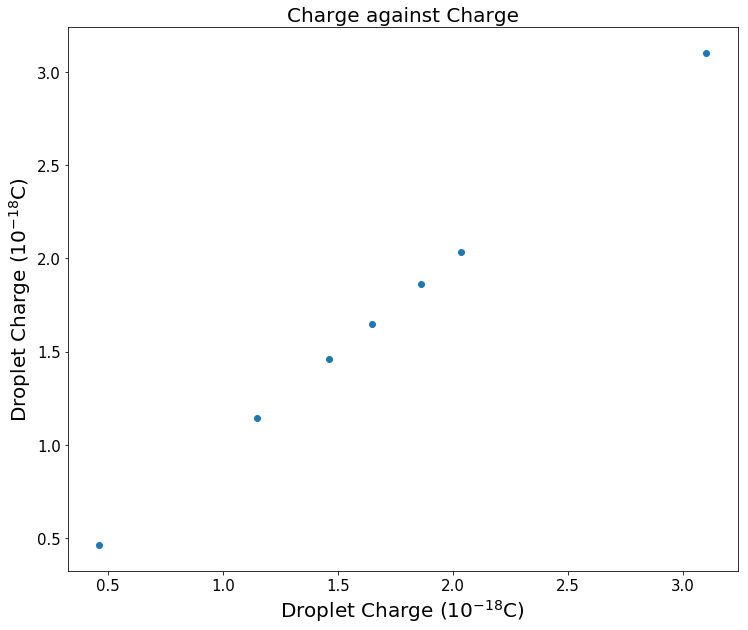

In [6]:
minSep = 1.5e-1    # minimum separation between droplet charges to cluster around - to be varied
#clusterQ = OneDClusteringAlg(Q,minSep)
#clusterAB = OneDClusteringAlg(AB,minSep)
#clusterDL = OneDClusteringAlg(DL,minSep)
#clusterMF = OneDClusteringAlg(MF,minSep)
#clusterMP = OneDClusteringAlg(MP,minSep)
#clusterME = OneDClusteringAlg(ME,minSep)
#clusterAW = OneDClusteringAlg(AW,minSep)
#clusterMM  = OneDClusteringAlg(MM,minSep)
clusterB_B =  OneDClusteringAlg(B_B,minSep)
clusterB_G =  OneDClusteringAlg(B_G,minSep)
clusterG_G =  OneDClusteringAlg(G_G,minSep)
clusterAll =  OneDClusteringAlg(All,minSep)

#chargevscharge(clusterQ,'clusterQ')
#chargevscharge(clusterAB,'clusterAB')
#chargevscharge(clusterDL,'clusterDL')
#chargevscharge(clusterMF,'clusterMF')
#chargevscharge(clusterMP,'clusterMP')
#chargevscharge(clusterME,'clusterME')
#chargevscharge(clusterAW,'clusterAW')
#chargevscharge(clusterMM,'clusterMM')
chargevscharge(clusterB_B, 'clusterBad')
chargevscharge(clusterB_G, 'clusterBadGood')
chargevscharge(clusterG_G, 'clusterGood')
chargevscharge(clusterAll, 'clusterAll')

In [68]:
def elemenatarycharge(clusteredQs,chargedist,name):
    '''This function takes a list of sorted charges and calculates their charge-distances in an attempt to calculate 
    the lowest common charge-distance assuming that all the charge-distances are related by an interger multiple of
    a fundamental constant.
    Required inputs: A list of charges that have been clustered to remove duplicate charge values, a clustering distance
    '''
    ecands = [] #holds the candidates for the elementary electric charge 
    for i in range(1,len(clusteredQs),1):         
        ecands.append((clusteredQs[i] - clusteredQs[i-1]))

    ne = OneDClusteringAlg(ecands,chargedist)
    fne = ["%.3f" % member for member in ne]

    plt.figure(figsize=(12, 10))

    plt.title('Charge against charge', size = 20)
    plt.xlabel('Elementary Charge ($10^{-18}$C)', size = 20)
    plt.ylabel('Elementary Charge ($10^{-18}$C)', size = 20)
    plt.xticks(size = 15)
    plt.yticks(size = 15)

    plt.scatter(ecands,ecands)
    plt.scatter(ne,ne)
    
    plotname2 = 'echargevsecharge_'+ name
    plt.savefig(plotname2)
    
    return ecands,fne

There are 5 adjacent points whose distances that are less than the threshold
Their values are:
0.17500000000000004
0.20700000000000007
0.21300000000000008
0.21675
0.2347499999999999
The average of these values is 0.209
 
5 point(s) have been clustered
There are 4 adjacent points whose distances that are less than the threshold
Their values are:
0.15244999999999986
0.15480000000000005
0.16200000000000003
0.16999999999999993
The average of these values is 0.160
 
4 point(s) have been clustered
There are 2 adjacent points whose distances that are less than the threshold
Their values are:
0.15866666666666662
0.17300000000000004
The average of these values is 0.166
 
There are 2 adjacent points whose distances that are less than the threshold
Their values are:
0.31099999999999994
0.33599999999999997
The average of these values is 0.323
 
4 point(s) have been clustered
There are 3 adjacent points whose distances that are less than the threshold
Their values are:
0.17500000000000004
0.1884999

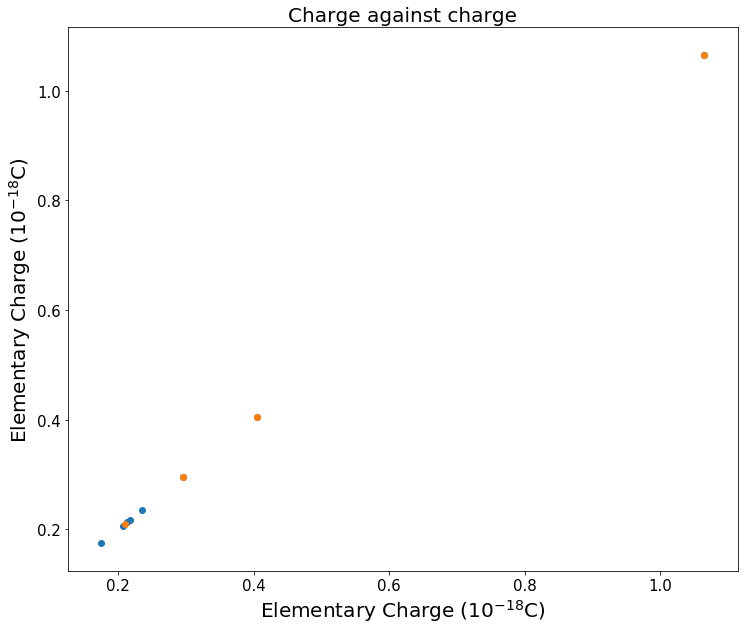

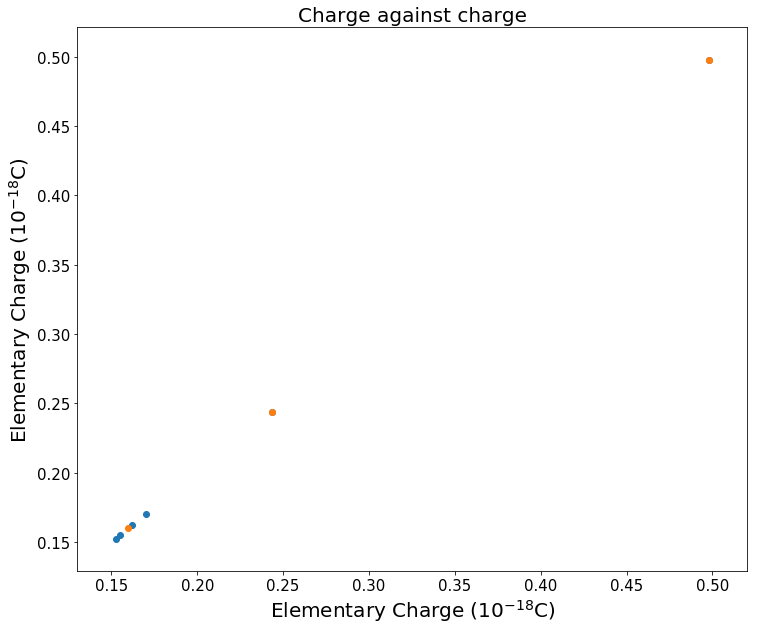

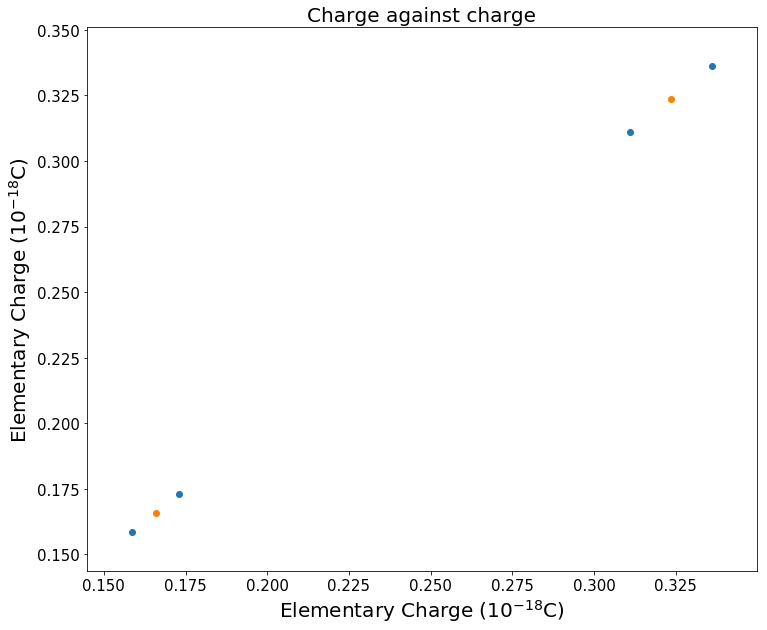

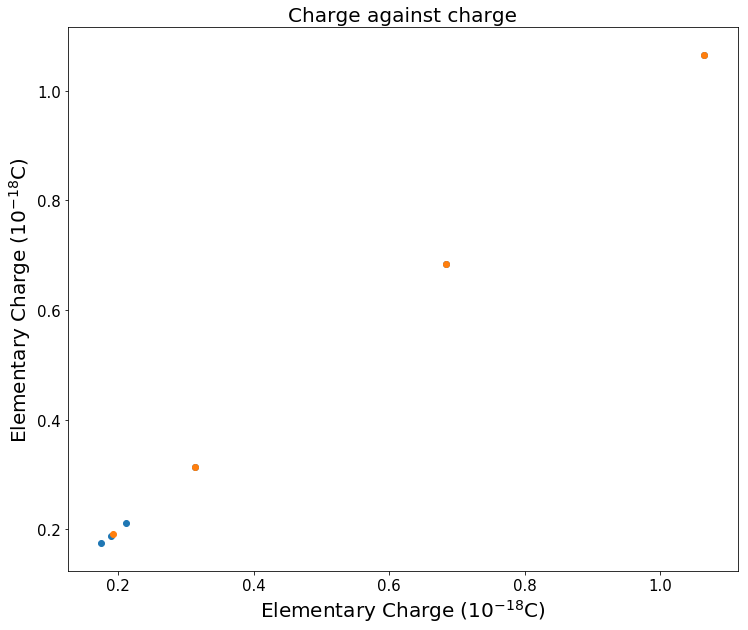

In [69]:
chargedist = 0.8e-1    # minimum separation between droplet charges to cluster around - to be varied
#ecandsQ, neQ = elemenatarycharge(clusterQ,chargedist)
#ecandsAB, neAB = elemenatarycharge(clusterAB,chargedist,'AB')
#ecandsDL, neDL = elemenatarycharge(clusterDL,chargedist,'DL')
#ecandsMF, neMF = elemenatarycharge(clusterMF,chargedist,'MF')
#ecandsMP, neMP = elemenatarycharge(clusterMP,chargedist,'MP')
#ecandsME, neME = elemenatarycharge(clusterME,chargedist,'ME')
#ecandsAW, neAW = elemenatarycharge(clusterAW,chargedist,'AW')
#ecandsMM, neMM = elemenatarycharge(clusterMM,chargedist,'MM')
ecandsB_B, neB_B = elemenatarycharge(clusterB_B,chargedist,'B_B')
ecandsB_G, neB_G = elemenatarycharge(clusterB_G,chargedist,'B_G')
ecandsG_G, neG_G = elemenatarycharge(clusterG_G,chargedist,'G_G')
ecandsAll, neAll = elemenatarycharge(clusterAll,chargedist,'All')

In [107]:
def printInfo(data,clustereddata,nxechargecandidates,nxecharges):
        datastr = f'The data: {data}*10e-18'
        print(datastr)
        print("")
        fclustereddata = ["%.3f" % point for point in clustereddata]
        fclustereddatastr = f'The data post clustering: {fclustereddata}*10e-18'
        print(fclustereddatastr)
        print("")
        fnxechargecandidates = ["%.3f" % charge for charge in nxechargecandidates]
        fnxechargecandidatesstr = f'The values of the charge-distances: {fnxechargecandidates}*10e-18'
        print(fnxechargecandidatesstr)
        print("")
        fnxecharges = f'FEC estimates are: {nxecharges}*10e-18'
        print(fnxecharges)
        print("")
        print("##################################")
        print("##################################")

In [108]:
printInfo(B_B,clusterB_B,ecandsB_B,neB_B)
printInfo(B_G,clusterB_G,ecandsB_G,neB_G)
printInfo(G_G,clusterG_G,ecandsG_G,neG_G)
printInfo(All,clusterAll,ecandsAll,neAll)

The data: [1.156, 0.397, 0.79, 0.538, 1.86, 1.44, 2.03, 1.16, 1.18, 0.916, 2.04, 1.004, 3.1, 0.93, 0.528, 0.427, 0.31, 1.083, 0.268, 0.457, 1.647, 0.451, 0.588, 0.66]*10e-18

The data post clustering: ['0.289', '0.506', '0.910', '1.145', '1.440', '1.647', '1.860', '2.035', '3.100']*10e-18

The values of the charge-distances: ['0.217', '0.404', '0.235', '0.295', '0.207', '0.213', '0.175', '1.065']*10e-18

FEC estimates are: ['0.21', '0.30', '0.40', '1.06']*10e-18

##################################
##################################
The data: [0.218, 0.224, 0.23, 0.344, 0.31, 0.32, 0.519, 0.357, 0.27, 0.284, 0.373, 0.736, 0.255, 0.302, 0.173, 0.706, 0.498, 0.151, 0.624, 0.176, 0.152, 0.536, 0.498, 0.34, 0.625, 0.635, 0.982, 1.65, 0.82, 1.48, 0.368]*10e-18

The data post clustering: ['0.269', '0.513', '0.665', '0.820', '0.982', '1.480', '1.650']*10e-18

The values of the charge-distances: ['0.243', '0.152', '0.155', '0.162', '0.498', '0.170']*10e-18

FEC estimates are: ['0.16', '0.24', '